# Multiple Outputs

## Two-output models

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Embedding, Input, Dense, Flatten, Concatenate
from keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
games_tourney = pd.read_csv('data/games_tourney_2.csv')
games_tourney_train = games_tourney.loc[:int(games_tourney.shape[0]*0.8),]
games_tourney_test = games_tourney.loc[int(games_tourney.shape[0]*0.8)+1:,]

In [3]:
# Define the input
input_tensor = Input(shape=(2,))

# Define the output
output_tensor = Dense(2)(input_tensor)

# Create a model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [4]:
# Fit the model
model.fit(games_tourney_train[['seed_diff', 'pred']],
          games_tourney_train[['score_1', 'score_2']],
          verbose=True,
          epochs=100,
          batch_size=16384)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 71.7505
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 71.7494
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 71.7483
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 71.7471
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 71.7460
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 71.7449
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 71.7437
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 71.7426
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 71.7415
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 71.7403
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 71.7392
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 71.7381
Epoch 13/100
1/1 [============================

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


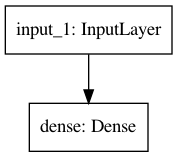

In [6]:
plot_model(model)

In [7]:
# Print the model's weights
print(model.get_weights())

# Print the column means of the training data
print(games_tourney_train.mean())

[array([[ 0.25448787,  1.0090358 ],
       [ 0.22733475, -1.0422189 ]], dtype=float32), array([0.09999995, 0.09999995], dtype=float32)]
season        1997.913813
team_1        5570.814050
team_2        5508.582940
home             0.000000
seed_diff       -0.007379
score_diff      -0.036600
score_1         71.661747
score_2         71.698347
won              0.499115
pred             0.128281
dtype: float64


In [8]:
# Evaluate the model on the games_tourney_test dataset
model.evaluate(games_tourney_test[['seed_diff', 'pred']],
               games_tourney_test[['score_1', 'score_2']], verbose=False)

68.86831665039062

## Single model for classification and regression

In [9]:
# Create an input layer with 2 columns
input_tensor = Input(shape=(2,))

# Create the first output
output_tensor_1 = Dense(1, activation='linear', use_bias=False, name='Regression-Layer')(input_tensor)

# Create the second output (use the first output as input here)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False, name='Classification-Layer')(output_tensor_1)

# Create a model with 2 outputs
model = Model(input_tensor, [output_tensor_1, output_tensor_2], name='Multiple-Ouputs')

In [10]:
# Import the Adam optimizer
from keras.optimizers import Adam

# Compile the model with 2 losses and the Adam optimzer with a higher learning rate
model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(lr=0.01))

# Fit the model to the tournament training data, with 2 inputs and 2 outputs
model.fit(games_tourney_train[['seed_diff', 'pred']],
          [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
          epochs=10,
          verbose=True,
          batch_size=16384)

Epoch 1/10
1/1 [==============================] - 0s 14ms/step - loss: 14.2906 - Regression-Layer_loss: 13.2266 - Classification-Layer_loss: 1.0641
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 14.2210 - Regression-Layer_loss: 13.1822 - Classification-Layer_loss: 1.0388
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 14.1526 - Regression-Layer_loss: 13.1379 - Classification-Layer_loss: 1.0146
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 14.0854 - Regression-Layer_loss: 13.0936 - Classification-Layer_loss: 0.9917
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 14.0197 - Regression-Layer_loss: 13.0497 - Classification-Layer_loss: 0.9699
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 13.9552 - Regression-Layer_loss: 13.0059 - Classification-Layer_loss: 0.9493
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 13.8921 - Regression-Layer_loss: 12.9623 - Cla

In [11]:
# Print the model weights
print(model.get_weights())

# Print the training data means
print(games_tourney_train.mean())

[array([[-0.24874288],
       [ 1.4852852 ]], dtype=float32), array([[0.28165907]], dtype=float32)]
season        1997.913813
team_1        5570.814050
team_2        5508.582940
home             0.000000
seed_diff       -0.007379
score_diff      -0.036600
score_1         71.661747
score_2         71.698347
won              0.499115
pred             0.128281
dtype: float64


In [12]:
# Import the sigmoid function from scipy
from scipy.special import expit as sigmoid

# Weight from the model
weight = 0.14

# Print the approximate win probability predicted close game
print(sigmoid(1 * weight))

# Print the approximate win probability predicted blowout game
print(sigmoid(10 * weight))

0.5349429451582145
0.8021838885585818


In [13]:
# Evaluate the model on new data
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
               [games_tourney_test[['score_diff']], games_tourney_test[['won']]], verbose=False))

[12.947988510131836, 12.107157707214355, 0.8408279418945312]


In [14]:
model.summary()

Model: "Multiple-Ouputs"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
Regression-Layer (Dense)     (None, 1)                 2         
_________________________________________________________________
Classification-Layer (Dense) (None, 1)                 1         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
